<br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:black">Projet -- Conversion rate challenge </span></div><br><br>
<div align="right"> </div>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:green">Machine Learning Supervisé  </span></div><br><br>
<div align="left"><span style="font-family:Lucida Caligraphy;font-size:20px;color:blue">Sidi DOUMBOUYA</span></div><br><br>
<hr>

# Description du Projet

Le Taux de Conversion web est un indicateur clé de performance permettant de mesurer la performance marketing d’un site web ou l’efficacité d’une campagne de web marketing.

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

- On nous propose ici de tester tout ce que nous avons appris sur le Machine Mearning supervisé, dans le but de faire un modèle de prédiction sur des données fournies, à la manière des compétitions Kaggle.

- On nous propose également d'essayer de créer le meilleur modèle pour prédire des conversions en fonction de différentes variables explicatives. 
- Pour finir, on précise aussi que l'évaluation de nos modèles se fera à l'aide du f1-score.

# Importation des Librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Ridge, Lasso, RidgeCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Lecture des Données

In [2]:
dataset = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', dataset.shape)
dataset.head()

Set with labels (our train+test) : (284580, 6)


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# I. Data exploration

In [3]:
# describe and info on dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [4]:
print(*dataset.columns, sep='\n')

country
age
new_user
source
total_pages_visited
converted


In [5]:
data_desc = dataset.describe(include='all')
display(data_desc)
print("Number of rows: {}".format(dataset.shape[0]))
print("Number of columns: {}".format(dataset.shape[1]))

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Number of rows: 284580
Number of columns: 6


In [6]:
# Verification & Gestion of NaN
dataset.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [7]:
dataset.country.unique()

array(['China', 'UK', 'Germany', 'US'], dtype=object)

In [8]:
dataset.source.unique()

array(['Direct', 'Ads', 'Seo'], dtype=object)

# II. Data visualisation

## Distribution des variables

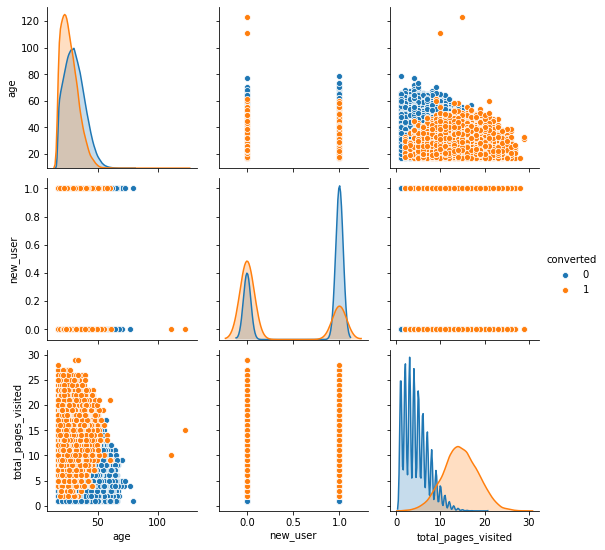

In [9]:
sns.pairplot(dataset, hue = 'converted')
plt.show()

# Variable converted (target variable)

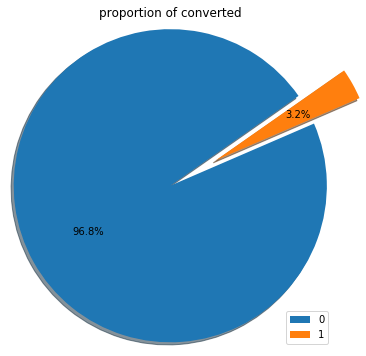

In [10]:
converted_number = dataset.converted.value_counts()
plt.figure(figsize = (8, 6))
plt.pie(converted_number, autopct='%1.1f%%', shadow=True, startangle=35, radius=1.2, explode=[0.0,0.4])
plt.legend(converted_number.index, loc='lower right')
plt.title("proportion of converted")

plt.show()

- Les classes sont fortement deséquilibrée **(seulement 3.2% de converted)**

# Variable âge

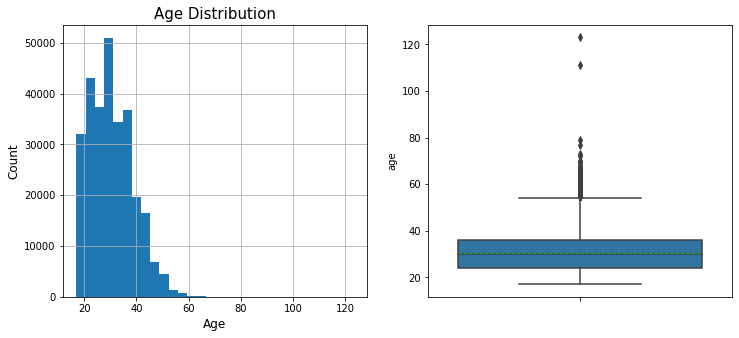

In [11]:
plt.subplot(121)
ax = dataset.age.hist(bins=30, figsize=(12, 5))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(True)

plt.subplot(122)
sns.boxplot(y='age', data=dataset, showmeans = True, meanline=True)

plt.show()

In [12]:
dataset[['converted', 'age']].groupby('converted').agg(['mean', 'median', 'min', 'max', 'count'])

age                        
                mean median min  max   count
converted                                   
0          30.697422     30  17   79  275400
1          26.567647     25  17  123    9180

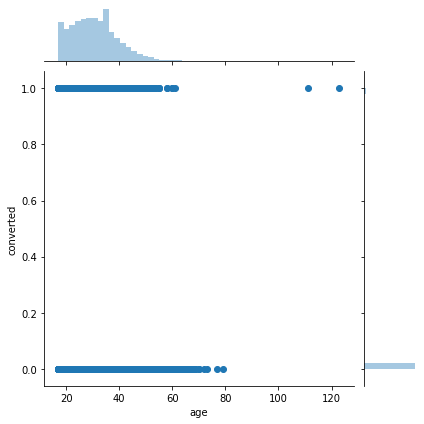

In [13]:
sns.jointplot('age', 'converted', data=dataset) 
plt.show()

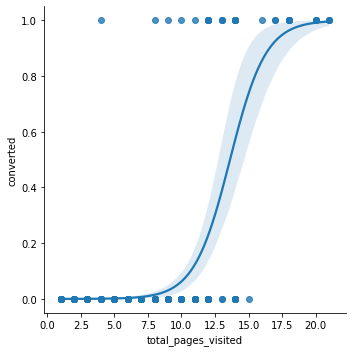

In [14]:
dataset_sample = dataset.sample(1000)    # I'm taking a sample of 1,000 so the computer won't be running for long.
sns.lmplot(x="total_pages_visited", y="converted", data=dataset_sample, logistic = True)
plt.show()

# La variable New_user

1    195066
0     89514
Name: new_user, dtype: int64


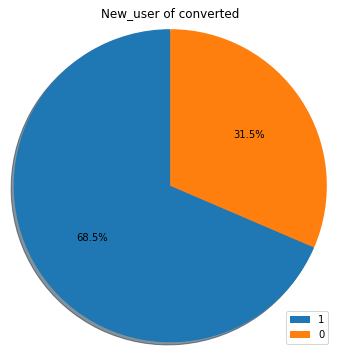

In [15]:
new_user = dataset.new_user.value_counts()
print(new_user)

plt.figure(figsize=(8,6))
plt.pie(new_user, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
plt.legend(new_user.index, loc = 'lower right')
plt.title("New_user of converted")

plt.show()

# Geographic location of customers

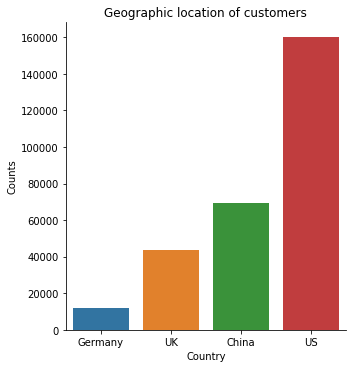

In [16]:
# Geographic location of customers
country = dataset.country.value_counts()
df_country = pd.DataFrame({"Country": country.index, "Counts":country.values}).sort_values(by ="Counts", ascending=True)

sns.catplot(data = df_country, x = "Country", y = "Counts", kind ="bar")
plt.title("Geographic location of customers")

plt.show()

In [17]:
dataset['country'] = dataset.country.map({1: 'UK', 2: 'US', 3: 'China', 
                          4: 'Germany'}).fillna(dataset.country)

US         160124
China       69122
UK          43641
Germany     11693
Name: country, dtype: int64


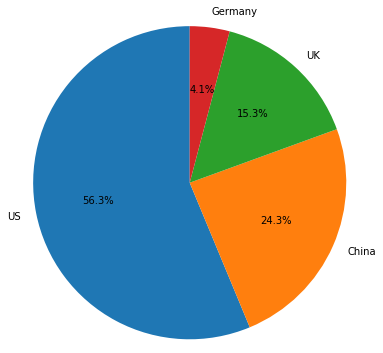

In [18]:
country_count = dataset.country.value_counts(dropna=False)
print(country_count)
plt.figure(figsize=(8,6))
labels = 'US', 'China', 'UK', 'Germany'
plt.pie(country_count, labels=labels, autopct='%1.1f%%', startangle=90, radius=1.2)
plt.show()

- Plus de la moitié des clients sont localisés aux USA soit 56.3%

## Overage converted by Country

In [19]:
dataset[['country', 'converted']].groupby('country').agg(['mean', 'count'])

converted        
             mean   count
country                  
China    0.001288   69122
Germany  0.062431   11693
UK       0.052497   43641
US       0.037908  160124

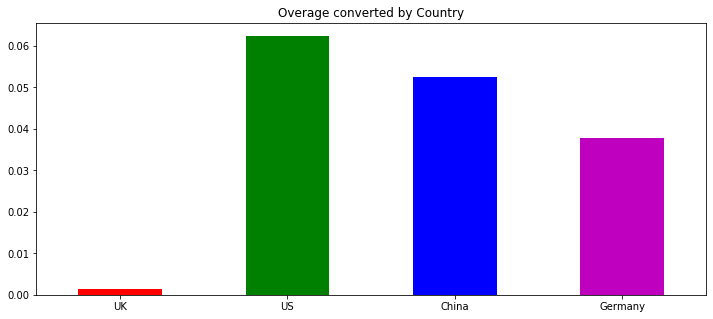

In [20]:
ax = dataset[['country', 'converted']].groupby('country').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Overage converted by Country',  color='rgbmy')
ax.set_xticklabels(['UK', 'US', 'China',  'Germany'], 
                    rotation='horizontal')
ax.set_xlabel('',fontsize=1)

plt.show()

## Traffic sources

Seo       139477
Ads        80027
Direct     65076
Name: source, dtype: int64


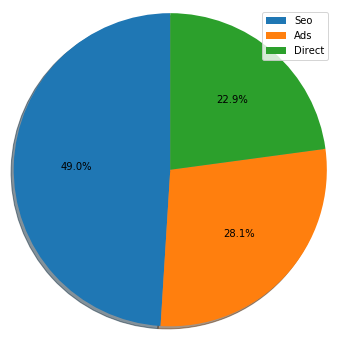

In [21]:
source = dataset.source.value_counts()
print(source)

plt.figure(figsize=(8,6))
plt.pie(source,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.2
       )
plt.legend(source.index, loc='upper right')
plt.show()

# III Correlation matrix

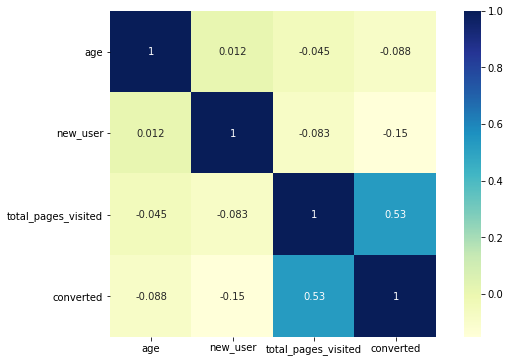

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr( ), cmap="YlGnBu", annot = True, square = True)
plt.show()

# IV. Modèle de prédiction du taux de conversion

# 1. Logistic Regression

In [23]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = 'converted'

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [24]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [25]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [26]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn

print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:3,:])
print(X_test[0:2,:])
print()
print(Y_train[0:3])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]]
[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]]

[0, 0, 0]
[0, 0]


# 1.2. Training pipeline (Training model)

In [27]:
# Encoding categorical features and standardizing numerical features

print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
                                   )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['China' 19 1 'Seo' 1]
 ['US' 33 1 'Direct' 5]
 ['US' 51 1 'Ads' 2]
 ['China' 17 0 'Seo' 1]
 ['China' 28 1 'Seo' 5]]
...Done
[[ 0.          0.          0.          0.          1.         -1.3990984
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.          0.29299544
   0.67651656  0.03743241]
 [ 0.          0.          1.          0.          0.          2.46854467
   0.67651656 -0.86015697]
 [ 0.          0.          0.          0.          1.         -1.64082609
  -1.47816042 -1.15935344]
 [ 0.          0.          0.          0.          1.         -0.31132378
   0.67651656  0.03743241]]


In [28]:
# Train model logistic
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [29]:
# Predictions on training set

print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



# 1.3. Test pipeline (Model Evaluation)

In [30]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[['UK' 34 1 'Ads' 1]
 ['UK' 32 0 'Ads' 5]
 ['US' 44 1 'Ads' 1]
 ['US' 35 1 'Direct' 1]
 ['US' 29 1 'Direct' 3]]
...Done
[[ 0.          1.          0.          0.          0.          0.41385929
   0.67651656 -1.15935344]
 [ 0.          1.          0.          0.          0.          0.1721316
  -1.47816042  0.03743241]
 [ 0.          0.          1.          0.          0.          1.62249775
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.          0.53472314
   0.67651656 -1.15935344]
 [ 0.          0.          1.          1.          0.         -0.19045994
   0.67651656 -0.56096051]]


In [31]:
# Predictions on test set

print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [32]:
print('Coefficients : ')
print(classifier.coef_)

Coefficients : 
[[ 3.57651267  3.4268022   3.05510971 -0.19740576 -0.04432634 -0.59425513
  -0.78442398  2.5489196 ]]


In [33]:
coefs1 = pd.DataFrame(index= [ 'China','UK', 'Germany', 'age', 'new_user', 'Direct','Seo', 
                              'total_pages_visited'], data = classifier.coef_.transpose(), columns=["coefficients"])

coefs1

,coefficients
China,3.576513
UK,3.426802
Germany,3.055110
age,-0.197406
new_user,-0.044326
Direct,-0.594255
Seo,-0.784424
total_pages_visited,2.548920


NB: La précision (Accuracy) peut être utilisée lorsque la distribution des classes est similaire, tandis que le score F1 est une meilleure mesure lorsqu'il y a des classes déséquilibrées, comme dans notre cas présent.

# 1.4. Performance assessment on Logistic Regression

In [34]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.765543748586932
f1_score on test set :  0.7554347826086957


## Confusion Matrix
- La matrice de confusion est un outil qui nous renseigne sur les performances du modèle par rapport à la prédiction. Elle se résume en quatre élements: Les Vrais positivfs **(TP)**, Vrais négatifs **(TN)**, Faux Positifs **(FP)** et Faux Négatifs **(FN)**. (Voir résultat dans le tableau ci-après)

In [35]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219474    846]
 [  2265   5079]]

Confusion matrix on test set : 
[[54855   225]
 [  585  1251]]



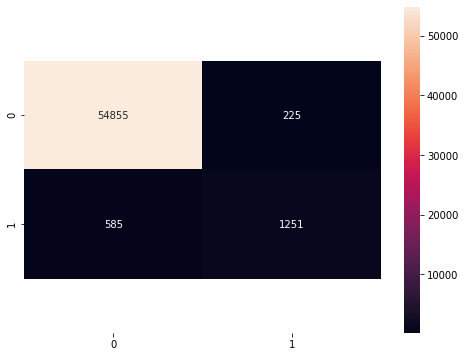

In [36]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Train best classifier on all data and use it to make predictions on X_without_labels

In [37]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test)

classifier.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [39]:
# THE SAME PREPROCESSING AS FOR OUR TEST SET
# USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31132378
  -1.47816042  3.3285935 ]
 [ 0.          1.          0.          1.          0.         -1.03650686
   0.67651656  0.03743241]
 [ 0.          0.          0.          0.          1.          0.1721316
   0.67651656 -1.15935344]
 [ 0.          0.          1.          0.          0.          0.1721316
   0.67651656  0.33662888]
 [ 0.          0.          0.          0.          1.         -0.67391532
  -1.47816042 -0.56096051]]


In [40]:
X_without_labels.shape

(31620, 8)

In [41]:
Y_predictions=classifier.predict(X_without_labels)

In [42]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = Sidi-model1

data = {
    'converted': classifier.predict(X_without_labels)
}

# Y_predictions = pd.DataFrame(columns=['converted'],data=dataset)
# Y_predictions=classifier.predict(X_without_labels)
Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_Sidi-Model1.csv', index=False)


## 2. Random forest avec GridSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50,criterion='gini', max_depth = 8)
rf_classifier.fit(X_train, Y_train)

print("accuracy train :", rf_classifier.score(X_train, Y_train))
print("accuracy test :", rf_classifier.score(X_test, Y_test))

accuracy train : 0.9865898868507976
accuracy test : 0.9852765478951437


In [44]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": [50,100]}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1).fit(X_train, Y_train)

In [45]:
classifier.best_params_

{'n_estimators': 100}

In [46]:
classifier.best_estimator_.score(X_test, Y_test)

0.9841872232764073

In [47]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [48]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.8073408128389925
f1_score on test set :  0.7315035799522673


In [49]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219638    682]
 [  1911   5433]]

Confusion matrix on test set : 
[[54790   290]
 [  610  1226]]



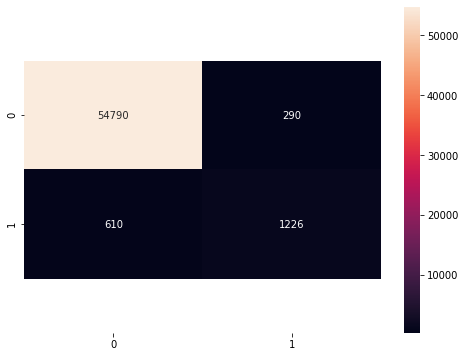

In [50]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Conclusion
- La regression logistique donne des meilleurs résultats de prédiction par rapport au modèle Random Forest. En effet, les erreurs de prédiction sont moindre dans le premier cas. 
- On peut tout de même rechercher à améliorer ces par résultats en essayant d'autres algorithmes. Toutefois, nous nous limitons à ces deux techniques dans ce présent projet. 